# Detección de clases con aprendizaje supervisado reproducible

## Oier Mentxaka
https://cran.r-project.org/web/packages/xgboost/xgboost.pdf

### Carga de librerías


In [4]:
library(tidyverse)
library(caret)
library(xgboost)
source("Modelos/xgboost.R")
source("Preprocesamiento/utils.R")
source("Preprocesamiento/plots.R")

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.1
v lubridate 1.9.3     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift



Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice



Attaching package: 'cowplot'


The following object is masked from 'package:lubridate':

    stamp



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




#### Asignación de la semilla

In [5]:
set.seed(123)

#### Lectura de fichero ya filtrado

In [6]:
data <- read.csv("../data/Statlog_XGB.csv", header = TRUE, sep = ",")

#### Separación de train y test y pesos

In [7]:
# Prepare the data for XGBoost
index <- createDataPartition(data$Class, p = 0.7, list = FALSE)

# Split the data
train <- data[index, ]
test <- data[-index, ]

### -1 porque el clasificador ha de empezar en 0 y en este dataset empieza en 1
y_train <- as.numeric(train$Class)-1
w_train <- as.numeric(train$Weights)
X_train <- as.matrix(train[, -which(names(train) %in% c("Class", "Weights"))])

y_test <- as.numeric(test$Class)-1
w_test <- as.numeric(test$Weights)
X_test <- as.matrix(test[, -which(names(test) %in% c("Class", "Weights"))])

#### Grid search

In [8]:
# # Definir las opciones de la búsqueda de cuadrícula
# objective_functions <- c("multi:softmax", "multi:softprob")#  Ejemplo de diferentes funciones objetivas
# nrounds_values <- seq(10, 50, 5)  # Ejemplo de diferentes números de rondas de refuerzo

# # Realizar la búsqueda de cuadrícula
# best_params <- grid_search(X_train, y_train, X_test, y_test, objective_functions, nrounds_values,train_weights = w_train, test_weights = w_test)
# print(paste("Best params:", best_params))

#### Selección de variables 

Seleccionadas tras realizar un estudio con grid search

In [9]:
nrounds <- 10
objective <- "multi:softmax"

#### Creación del modelo

In [10]:
xgb_model <- xgboost(data = X_train, label = y_train, nrounds = nrounds, objective = objective, num_class = 2, weight = w_train)

[1]	train-mlogloss:0.568521 
[2]	train-mlogloss:0.495009 
[3]	train-mlogloss:0.438243 
[4]	train-mlogloss:0.399922 
[5]	train-mlogloss:0.370609 
[6]	train-mlogloss:0.337860 
[7]	train-mlogloss:0.316878 
[8]	train-mlogloss:0.297514 
[9]	train-mlogloss:0.269104 
[10]	train-mlogloss:0.254051 


#### Obtención de predicciones

In [11]:
predictions <- predict(xgb_model, newdata = X_test, weights = w_test)

#### Matriz de confusión

In [12]:
confusion_matrix <- confusion_matrix(predictions, y_test)

[1] "Confusion Matrix:"
           y_test
predictions   0   1
          0 184  50
          1  20  46


#### Precisión del modelo

In [13]:
# Calculate accuracy
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
print(paste("Accuracy:", round(accuracy, 2)))

[1] "Accuracy: 0.77"


#### División grárica de las clases 

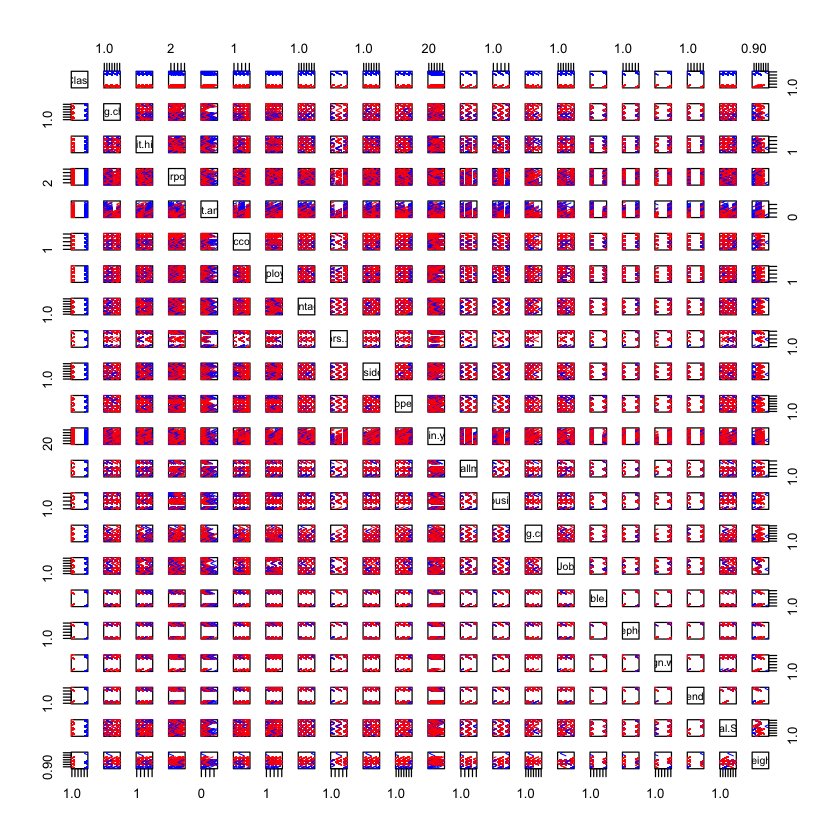

In [21]:
#TODO
# Generar datos de ejemplo
set.seed(123)

# Cargar librería necesaria para cambiar los colores
library(ggplot2)

# Establecer el tamaño de la ventana gráfica
quartz(width = 10, height = 8)

# Crear matriz de dispersión con puntos más grandes
pairs(data[, -3], col = ifelse(data$Class == 1, "red", "blue"), cex = 1, pch = 60)

# Agregar leyenda para los colores
legend("topright", legend = unique(data$Class), col = c("red", "blue"), pch = 60)

